In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle as w
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = w.acquire_wine()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
train, validate, test = w.train_val_test(df)
train, validate, test

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 3761            9.9             0.490         0.23            2.40      0.087   
 3740            7.7             0.280         0.35           15.30      0.056   
 1359           11.6             0.475         0.40            1.40      0.091   
 1230            7.7             0.180         0.34            2.70      0.066   
 4751            7.6             0.250         1.23            4.60      0.035   
 ...             ...               ...          ...             ...        ...   
 3772            7.6             0.320         0.58           16.75      0.050   
 5191            5.6             0.280         0.27            3.90      0.043   
 5226            6.4             0.370         0.20            5.60      0.117   
 5390            6.5             0.260         0.50            8.00      0.051   
 860             7.2             0.620         0.06            2.70      0.077   
 
       free su

In [4]:
train_scaled, val_scaled, test_scaled = w.wrangle_wine()


In [5]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4547 entries, 3761 to 860
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4547 non-null   float64
 1   volatile_acidity      4547 non-null   float64
 2   citric_acid           4547 non-null   float64
 3   residual_sugar        4547 non-null   float64
 4   chlorides             4547 non-null   float64
 5   free_sulfur_dioxide   4547 non-null   float64
 6   total_sulfur_dioxide  4547 non-null   float64
 7   density               4547 non-null   float64
 8   ph                    4547 non-null   float64
 9   sulphates             4547 non-null   float64
 10  alcohol               4547 non-null   float64
 11  quality               4547 non-null   float64
dtypes: float64(12)
memory usage: 461.8 KB


In [6]:
train_scaled.describe(include='all')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000
mean,0.288089,0.171423,0.260113,0.074497,0.077343,0.202787,0.324342,0.145829,0.375674,0.175800,0.411216,0.470017
std,0.109123,0.107906,0.118116,0.073429,0.055783,0.119695,0.165700,0.058221,0.126206,0.083620,0.197803,0.146884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.220339,0.100000,0.203252,0.018405,0.048173,0.109966,0.215976,0.100058,0.291339,0.119318,0.247934,0.333333
50%,0.271186,0.140000,0.252033,0.036810,0.063123,0.192440,0.331361,0.150183,0.370079,0.159091,0.380165,0.500000
75%,0.322034,0.213333,0.317073,0.116564,0.091362,0.274914,0.443787,0.189319,0.456693,0.215909,0.545455,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train_scaled.quality

3761    0.500000
3740    0.333333
1359    0.500000
1230    0.500000
4751    0.500000
          ...   
3772    0.333333
5191    0.666667
5226    0.333333
5390    0.333333
860     0.333333
Name: quality, Length: 4547, dtype: float64

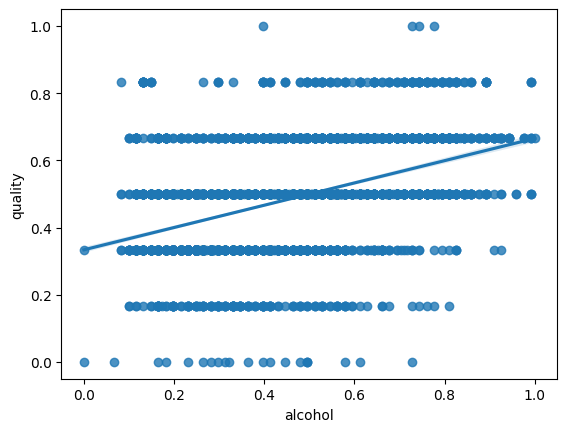

In [8]:
sns.regplot(x='alcohol', y='quality', data=train_scaled)
plt.show()

In [9]:
wine_type = w.clean_wine()
wine_type.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df['quality'] = pd.cut(df['quality'], [0, 3, 7, 10], labels=['low', 'medium', 'high'])

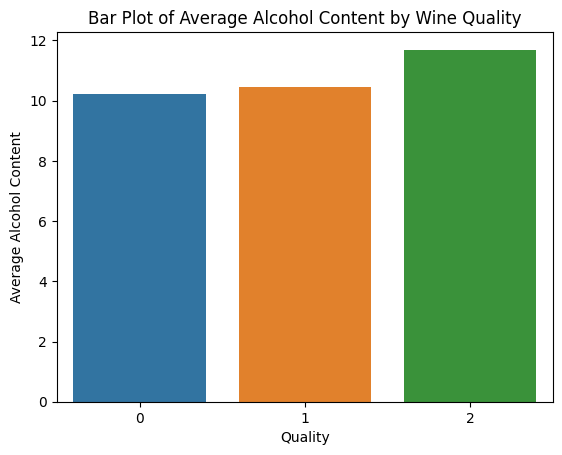

In [30]:
sns.barplot(data=df, x='quality', y='alcohol', ci = None)

plt.title('Bar Plot of Average Alcohol Content by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Average Alcohol Content')
plt.show()

<BarContainer object of 4547 artists>

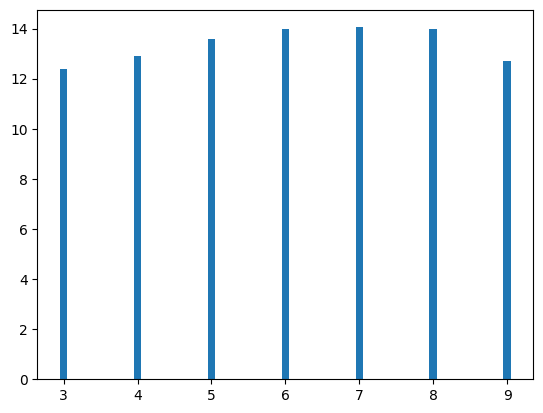

In [12]:
plt.bar(x='quality',height='alcohol',data=train,width=.1,)


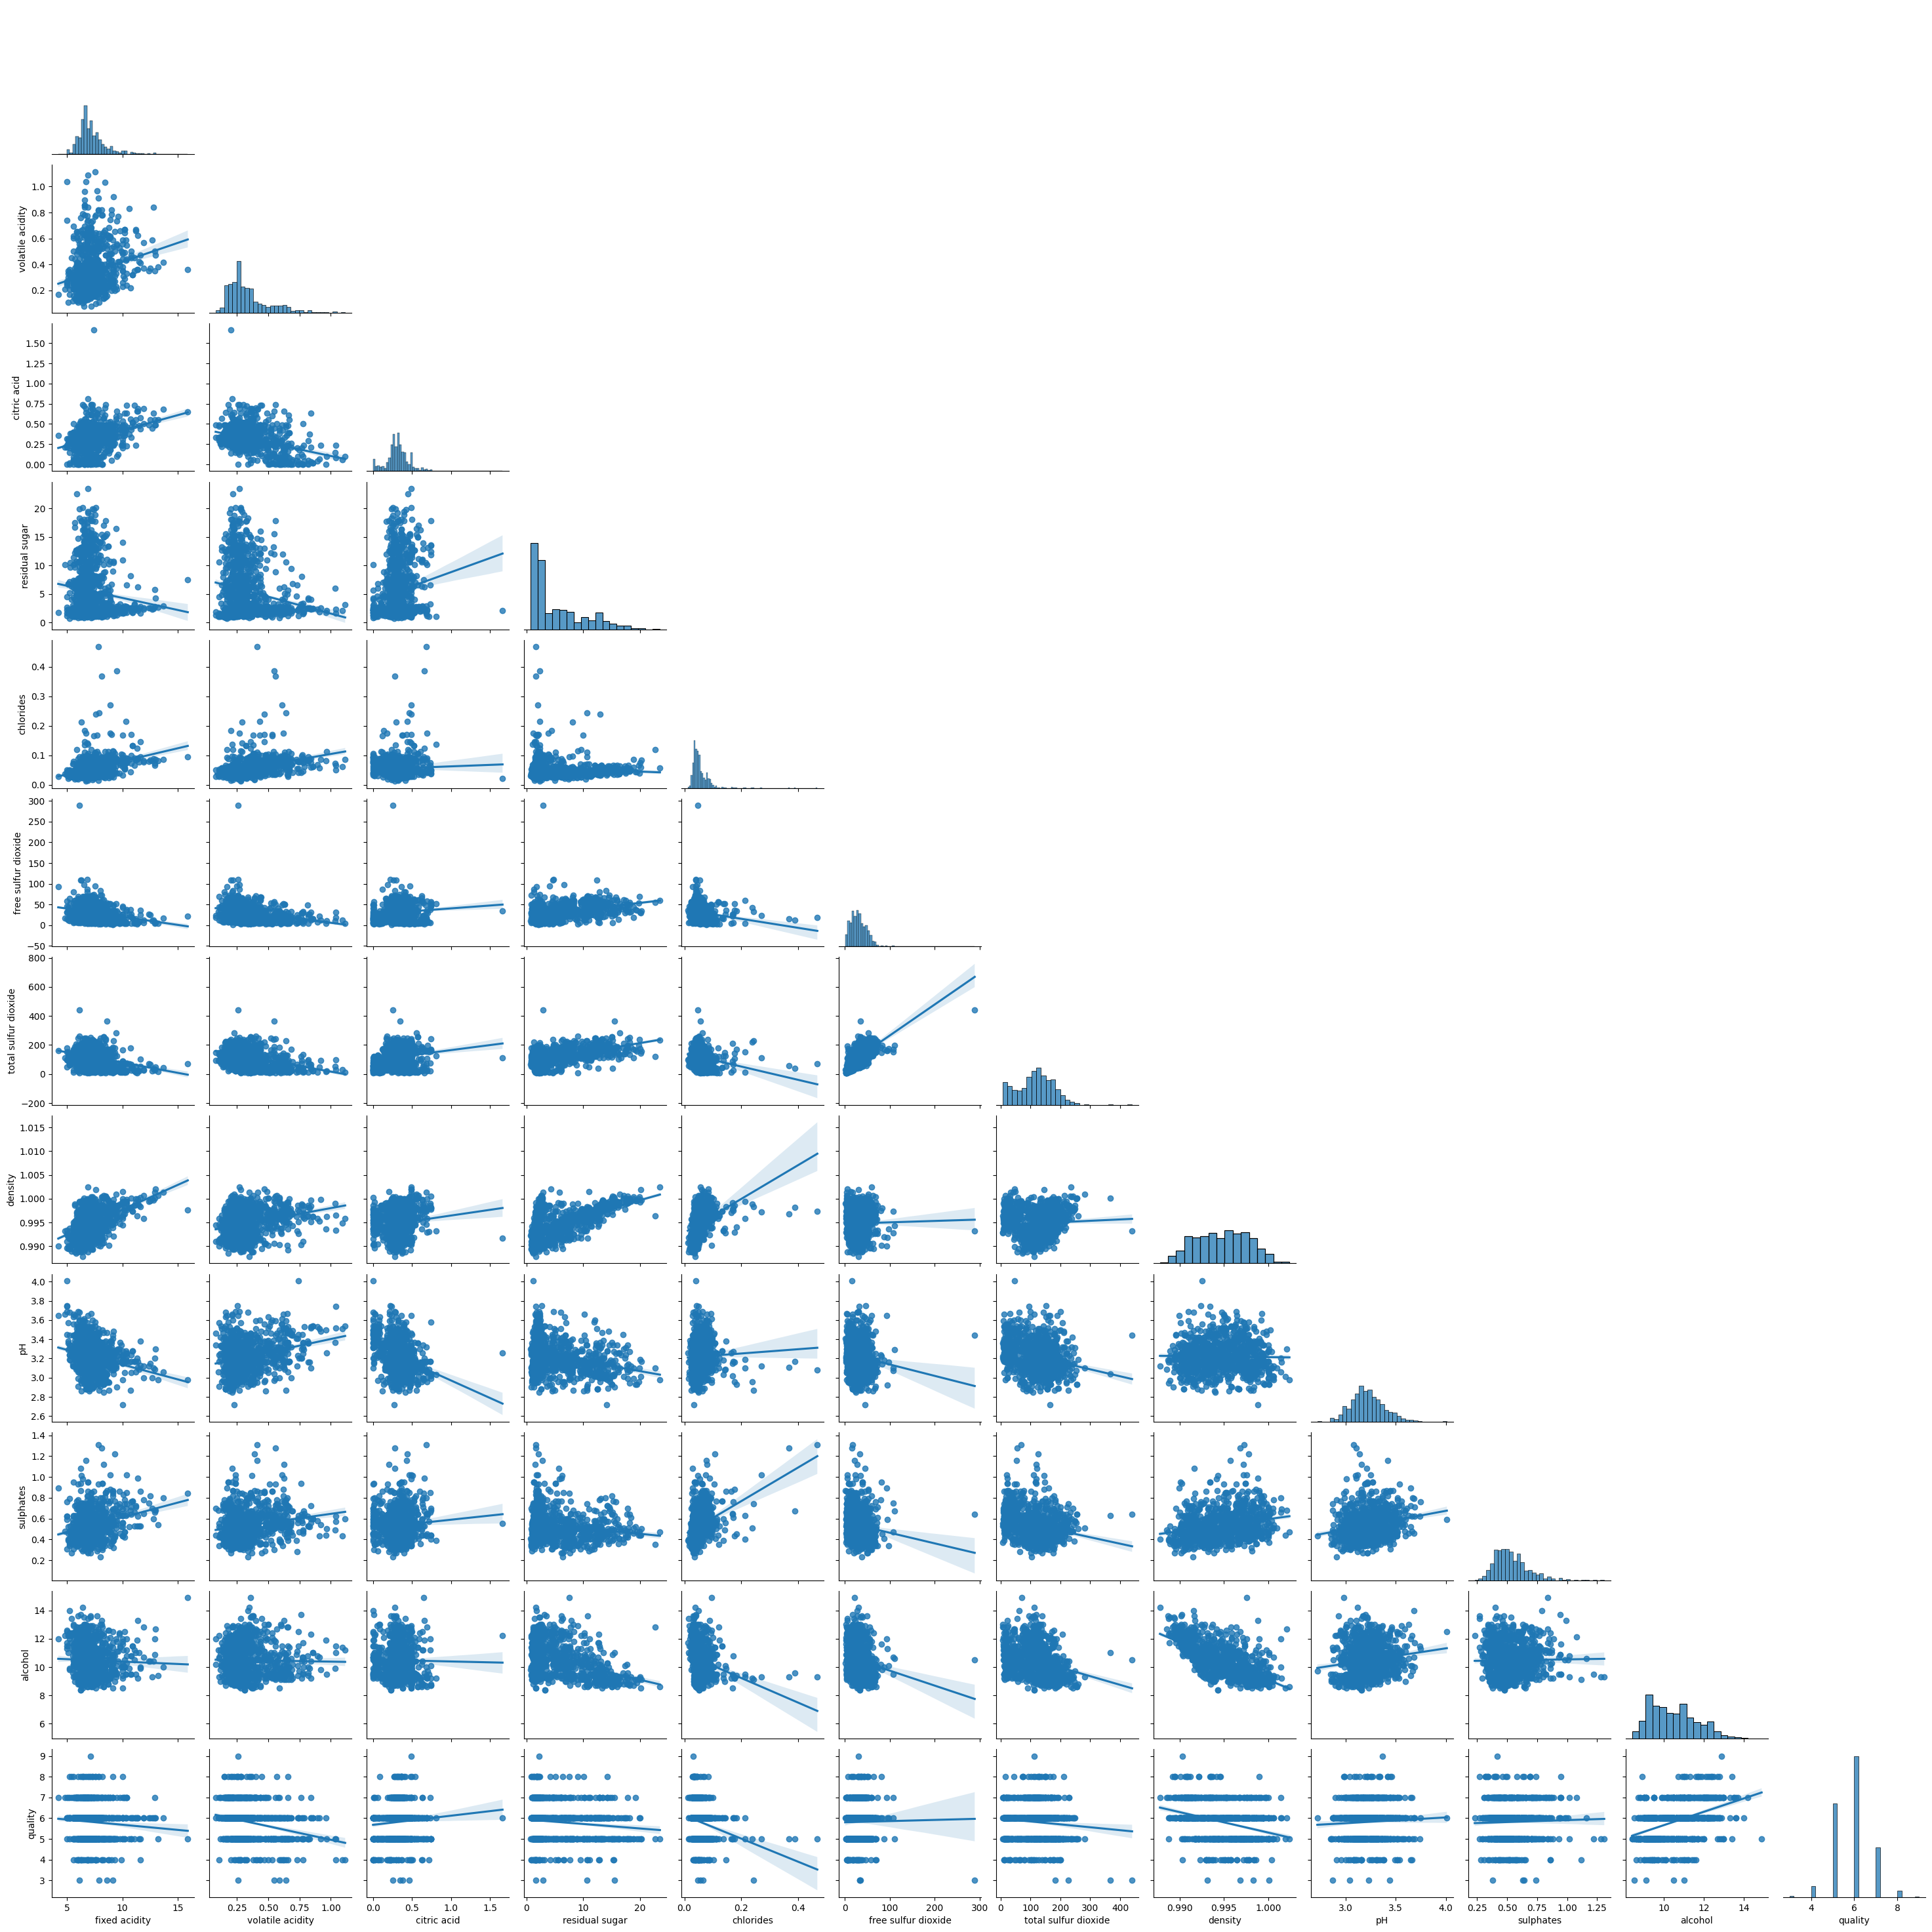

In [13]:
sns.pairplot(test, kind='reg',corner=True)
# grid of scatter plots for each pair of numerical columns in the test
# quickly examining relationships and correlations between numerical variables in the dataset

In [14]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

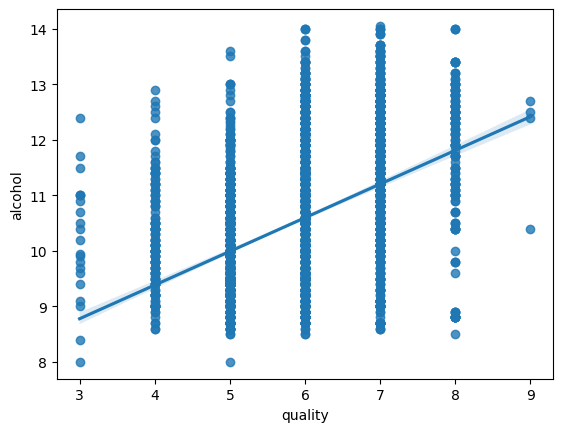

In [15]:
sns.regplot(y='alcohol', x='quality', data=train)
plt.show()

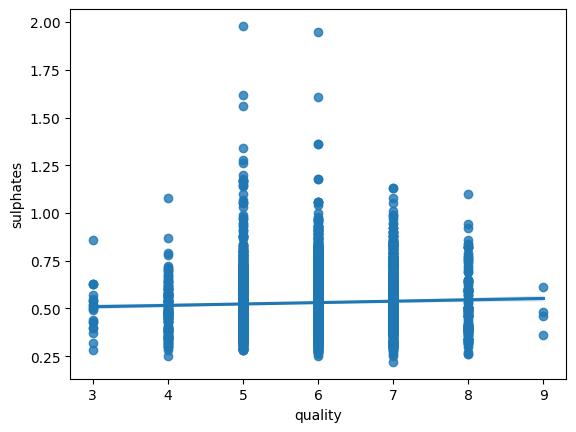

In [16]:
sns.regplot(y='sulphates', x='quality', data=train)
plt.show()

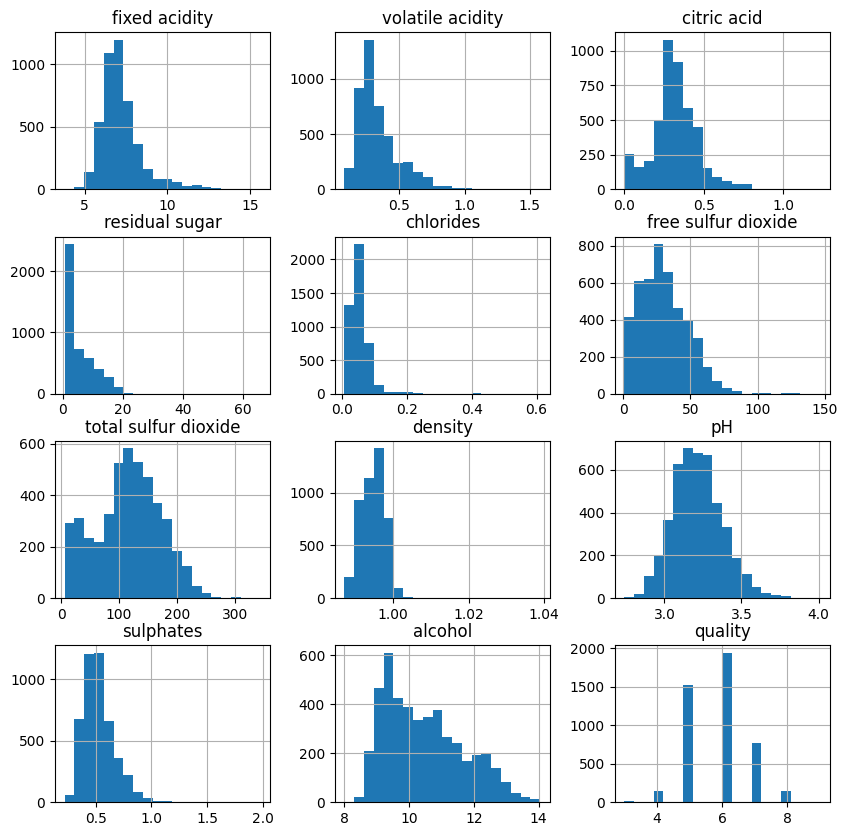

In [17]:
train.hist(bins=20, figsize=(10, 10))
plt.show()

In [18]:
# Convert the 'quality' column to category type if it isn't already
df['quality'] = df['quality'].astype('category')

# Convert category to numerical values
df['quality'] = df['quality'].cat.codes

# Now both columns should be numerical


In [19]:
import scipy.stats as stats

Null Hypothesis: There is no significant difference between the sulphate levels and wine quality.
Alternative Hypothesis: There is a significant difference between the sulphate levels and wine quality.


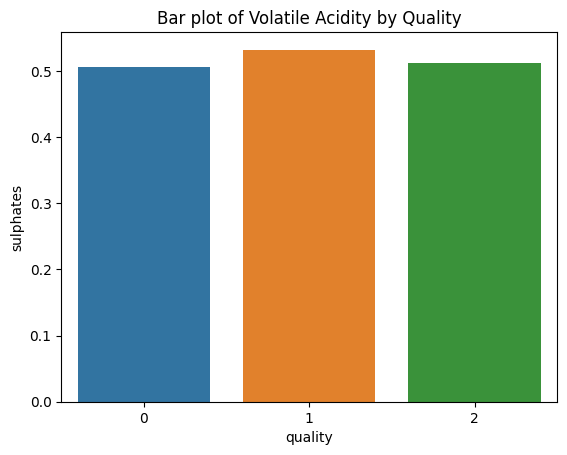

,T-Statistic,P-Value,Decision
0,-167.608918,0.0,Reject Null Hypothesis


In [20]:
def run_sulphates_ttest(data):
    '''
    runs a Ttest for sulphates vs quality
    '''
    # Check for columns
    if 'sulphates' not in data.columns or 'quality' not in data.columns:
        return "Columns not found in the DataFrame"
    
    # Define Hypothesis
    print("Null Hypothesis: There is no significant difference between the sulphate levels and wine quality.")
    print("Alternative Hypothesis: There is a significant difference between the sulphate levels and wine quality.")
    
    x = data['sulphates']
    y = data['quality']
    
    # Scatter Plot
    sns.barplot(x='quality', y='sulphates', data=data, ci = None)
    plt.title('Bar plot of Volatile Acidity by Quality')
    plt.show()
    
    
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(x, y)
    
    # Decide whether to reject the null hypothesis
    alpha = 0.05
    if p_value <= alpha:
        decision = "Reject Null Hypothesis"
    else:
        decision = "Fail to Reject Null Hypothesis"
        
    # Create a DataFrame to store the results
    results = pd.DataFrame({
        'T-Statistic': [t_statistic],
        'P-Value': [p_value],
        'Decision': [decision]
    })
    
    return results
run_sulphates_ttest(df)


In [21]:
print(df['sulphates'].dtype)
print(df['quality'].dtype)


float64
int8


In [22]:
print(df['quality'].unique())


[1 2 0]


In [23]:
df = df.dropna(subset=['quality'])


Null Hypothesis: There is no significant difference between the citric acid levels and wine quality.
Alternative Hypothesis: There is a significant difference between the citric acid levels and wine quality.


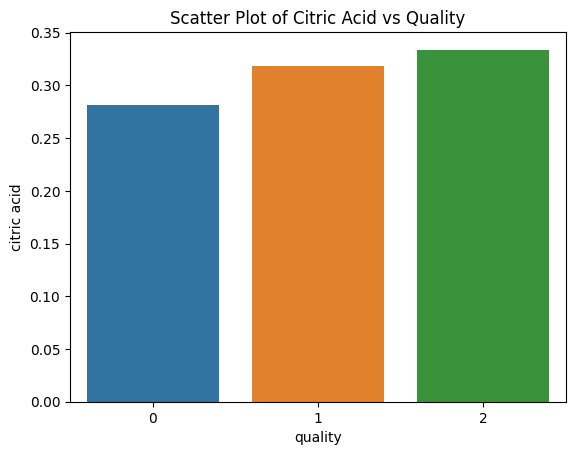

,T-Statistic,P-Value,Decision
0,-241.870788,0.0,Reject Null Hypothesis


In [24]:
def run_citric_acid_ttest(data):
    '''
    runs a Ttest for citric acid vs quality
    '''
    
    # First check if the columns are in the DataFrame
    if 'citric acid' not in data.columns or 'quality' not in data.columns:
        return "The required columns are not found in the DataFrame."
    
    # Define and print the hypothesis
    print("Null Hypothesis: There is no significant difference between the citric acid levels and wine quality.")
    print("Alternative Hypothesis: There is a significant difference between the citric acid levels and wine quality.")
    
    # Create a scatter plot for visualization
    sns.barplot(x='quality', y='citric acid', data=data, ci = None)
    plt.title('Scatter Plot of Citric Acid vs Quality')
    plt.show()
    
    x = data['citric acid']
    y = data['quality']
    
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(x, y)
    
    # Decide whether to reject the null hypothesis
    alpha = 0.05
    if p_value <= alpha:
        decision = "Reject Null Hypothesis"
    else:
        decision = "Fail to Reject Null Hypothesis"
        
    # Create a DataFrame to store the results
    results = pd.DataFrame({
        'T-Statistic': [t_statistic],
        'P-Value': [p_value],
        'Decision': [decision]
    })
    
    return results

# Assuming `df` is your DataFrame containing the data
# df = pd.read_csv('your_data.csv')

# Run the t-test function
run_citric_acid_ttest(df)


Null Hypothesis: There is no significant difference between alcohol levels and wine quality.
Alternative Hypothesis: There is a significant difference between alcohol levels and wine quality.


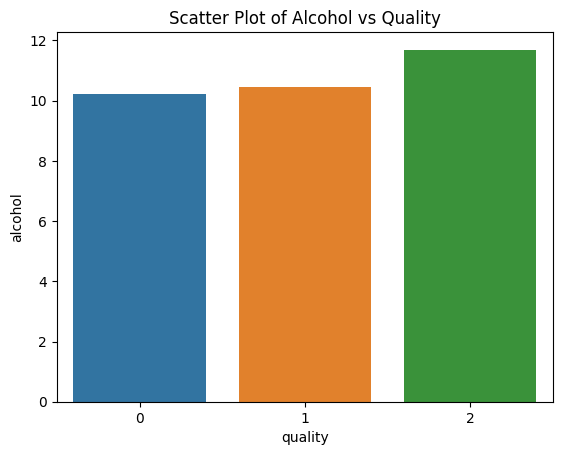

,T-Statistic,P-Value,Decision
0,632.108831,0.0,Reject Null Hypothesis


In [25]:
def run_alcohol_ttest(data):
    '''
    runs a Ttest for alcohol vs quality
    '''
    
    #  check if the columns are in the DataFrame
    if 'alcohol' not in data.columns or 'quality' not in data.columns:
        return "The required columns are not found in the DataFrame."
    
    # Define and print the hypothesis
    print("Null Hypothesis: There is no significant difference between alcohol levels and wine quality.")
    print("Alternative Hypothesis: There is a significant difference between alcohol levels and wine quality.")
    
    #  scatter plot for visualization
    sns.barplot(x='quality', y='alcohol', data=data, ci = None)
    plt.title('Scatter Plot of Alcohol vs Quality')
    plt.show()
    
    x = data['alcohol']
    y = data['quality']
    
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(x, y)
    
    # Decide whether to reject the null hypothesis
    alpha = 0.05
    if p_value <= alpha:
        decision = "Reject Null Hypothesis"
    else:
        decision = "Fail to Reject Null Hypothesis"
        
    # Create a DataFrame to store the results
    results = pd.DataFrame({
        'T-Statistic': [t_statistic],
        'P-Value': [p_value],
        'Decision': [decision]
    })
    
    return results

# Assuming `df` is your DataFrame containing the data
# df = pd.read_csv('your_data.csv')

# Run the t-test function
run_alcohol_ttest(df)


Null Hypothesis: There is no significant difference between the volatile acidity and wine quality.
Alternate Hypothesis: There is a significant difference between the volatile acidity level and wine quality.


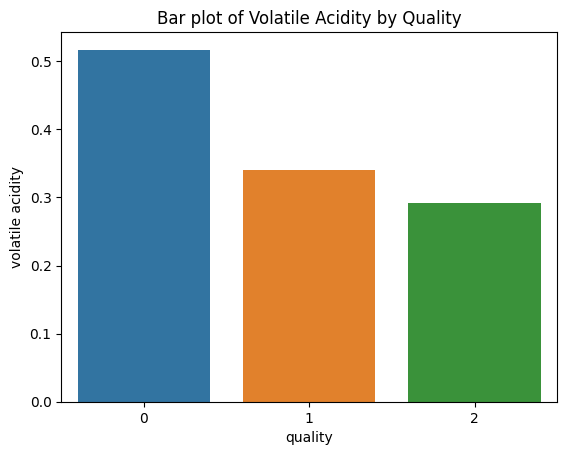

,T-Statistic,P-Value,Decision
0,-222.967325,0.0,Reject Null Hypothesis


In [26]:
def run_volatile_acidity_ttest(data):
    '''
    runs a Ttest for volatile acidity vs quality
    '''
    if 'volatile acidity' not in data.columns or 'quality' not in data.columns:
        return 'The required columns are not found in the DF.'

    # Define and print the hypothesis
    print('Null Hypothesis: There is no significant difference between the volatile acidity and wine quality.')
    print('Alternate Hypothesis: There is a significant difference between the volatile acidity level and wine quality.')

    # Bar plot for visualization
    sns.barplot(x='quality', y='volatile acidity', data=data, ci = None)
    plt.title('Bar plot of Volatile Acidity by Quality')
    plt.show()
    
    x = data['volatile acidity']
    y = data['quality']
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(x, y)
    # Decide whether to reject the null hypothesis
    alpha = 0.05
    if p_value <= alpha:  # Changed this line to be more accurate, as you typically reject the null if p <= alpha
        decision = "Reject Null Hypothesis"
    else:
        decision = "Fail to Reject Null Hypothesis"

    # Create a DataFrame to store the results
    results = pd.DataFrame({
        'T-Statistic': [t_statistic],
        'P-Value': [p_value],
        'Decision': [decision]})
    return results

run_volatile_acidity_ttest(df)


In [27]:
alpha = 0.05

In [28]:
overall_mean = train.quality.mean()
overall_mean

5.8201011656036945

In [29]:
#is there a relation between alcholol and quality